In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
path = "VD_Regression-Chuan hoa.csv"
df = pd.read_csv(path)

In [5]:
df


,STT,LOAI XE,NAm SX,Tuoi xe,So KM,so km( van),GIA BAN (trieu dong),Gia ban(tram trieu dong)
0,1,Navara,2015,5,63000,6.3000,568,5.68
1,2,Navara,2016,4,19253,1.9253,470,4.70
2,3,Navara,2012,8,150000,15.0000,325,3.25
3,4,Navara,2017,3,45000,4.5000,539,5.39
4,5,Navara,2016,4,40000,4.0000,499,4.99
...,...,...,...,...,...,...,...,...
96,97,Navara,2016,4,46000,4.6000,518,5.18
97,98,Navara,2014,6,60000,6.0000,307,3.07
98,99,Navara,2016,4,30000,3.0000,606,6.06
99,100,Navara,2016,4,70000,7.0000,615,6.15


In [6]:
del df['NAm SX']

In [7]:
del df['So KM']

In [8]:
del df['GIA BAN (trieu dong)']

In [9]:
df

,STT,LOAI XE,Tuoi xe,so km( van),Gia ban(tram trieu dong)
0,1,Navara,5,6.3000,5.68
1,2,Navara,4,1.9253,4.70
2,3,Navara,8,15.0000,3.25
3,4,Navara,3,4.5000,5.39
4,5,Navara,4,4.0000,4.99
...,...,...,...,...,...
96,97,Navara,4,4.6000,5.18
97,98,Navara,6,6.0000,3.07
98,99,Navara,4,3.0000,6.06
99,100,Navara,4,7.0000,6.15


In [10]:
x_data = df.values[:,2:4]

In [11]:
x_data

array([[5, 6.3],
       [4, 1.9253],
       [8, 15.0],
       [3, 4.5],
       [4, 4.0],
       [3, 4.3],
       [3, 1.9],
       [7, 6.5],
       [1, 3.0],
       [2, 1.9],
       [2, 1.5],
       [5, 8.5],
       [6, 8.6],
       [7, 7.0],
       [5, 4.5],
       [4, 7.0],
       [3, 4.5],
       [3, 3.3],
       [7, 5.5],
       [3, 4.5],
       [4, 8.0],
       [2, 3.8],
       [7, 8.0],
       [4, 5.3],
       [8, 15.0],
       [2, 2.5],
       [2, 0.9],
       [2, 1.6],
       [2, 2.5],
       [3, 4.0],
       [7, 11.8],
       [5, 4.5],
       [6, 6.0],
       [3, 1.9],
       [2, 1.2],
       [3, 3.0],
       [4, 4.2],
       [7, 0.6],
       [4, 4.2],
       [3, 2.8],
       [4, 6.1],
       [3, 2.6],
       [2, 1.4],
       [4, 5.3],
       [7, 6.5],
       [8, 15.0],
       [7, 6.5],
       [2, 0.9],
       [4, 3.2],
       [3, 1.2],
       [7, 9.0],
       [4, 4.1235],
       [8, 1.5],
       [5, 4.5],
       [2, 0.9],
       [4, 3.5],
       [5, 4.5],
       [2, 1.0],
    

In [12]:
y_data = df.values[:,4:5]

In [13]:
y_data

array([[5.68],
       [4.7],
       [3.25],
       [5.39],
       [4.99],
       [5.13],
       [5.4],
       [3.68],
       [5.95],
       [5.06],
       [5.59],
       [4.05],
       [4.25],
       [3.75],
       [5.99],
       [6.15],
       [5.45],
       [5.55],
       [3.68],
       [5.39],
       [4.99],
       [6.69],
       [4.25],
       [5.05],
       [3.25],
       [5.25],
       [5.75],
       [5.89],
       [5.22],
       [5.4],
       [3.55],
       [5.99],
       [4.0],
       [5.55],
       [7.05],
       [5.6],
       [4.6],
       [4.35],
       [5.15],
       [5.59],
       [4.95],
       [5.28],
       [5.89],
       [5.05],
       [3.68],
       [3.25],
       [3.68],
       [5.8],
       [5.08],
       [5.39],
       [3.7],
       [5.19],
       [3.45],
       [5.68],
       [5.85],
       [5.15],
       [5.68],
       [5.85],
       [5.15],
       [5.7],
       [3.65],
       [5.85],
       [5.1],
       [5.75],
       [3.6],
       [4.15],
       [5.48],
      

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 100)

In [15]:
n_dim = x_train.shape[1]
print(n_dim)

2


In [16]:
x = tf.placeholder(tf.float32, [None, n_dim])
y = tf.placeholder(tf.float32, [None, 1])

In [17]:
w = tf.Variable(tf.ones([n_dim, 1]))

b = tf.Variable(np.random.randn(), dtype = tf.float32)

In [18]:
pred = tf.add(tf.matmul(x, w), b)

In [19]:
loss = tf.reduce_mean(tf.square(pred - y))

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [21]:
sess = tf.Session()

In [32]:
# Training
sess.run(init)
epochs = 2000

loss_history = []

for epoch in range(epochs):
    
    sess.run(optimizer, feed_dict ={x: x_train, y: y_train})
    
    test_loss = sess.run(loss, feed_dict={x: x_test, y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 200 ==    
        print("epoch {} Test loss = {}".format(epoch, test_loss))
        
print("training finished")

epoch 0 Test loss = 31.510814666748047
epoch 200 Test loss = 2.525347948074341
epoch 400 Test loss = 0.7705277800559998
epoch 600 Test loss = 0.311638206243515
epoch 800 Test loss = 0.19414517283439636
epoch 1000 Test loss = 0.16538529098033905
epoch 1200 Test loss = 0.15905901789665222
epoch 1400 Test loss = 0.15806983411312103
epoch 1600 Test loss = 0.15816757082939148
epoch 1800 Test loss = 0.15838085114955902
training finished


In [33]:
sess.run(w)

array([[-0.3905113 ],
       [-0.00923099]], dtype=float32)

In [34]:
sess.run(b)

6.740608

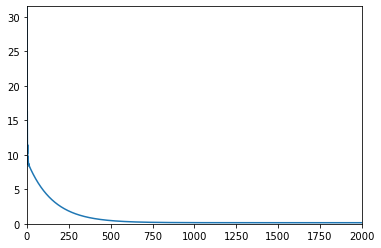

In [35]:

plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()

In [26]:
pred_y = sess.run(pred, feed_dict = {
    x : [[4, 5],]
})

In [27]:
print(pred_y)

[[5.1346283]]


In [28]:
#testtt
4*(-0.39204454)+5*(-0.00936028)+6.749608

5.13462844